# KorCLIP

In [1]:
import requests
from PIL import Image

import torch
from torchvision import transforms as T
from utils import load_korclip

In [2]:
model, tokenizer = load_korclip("output/checkpoint")

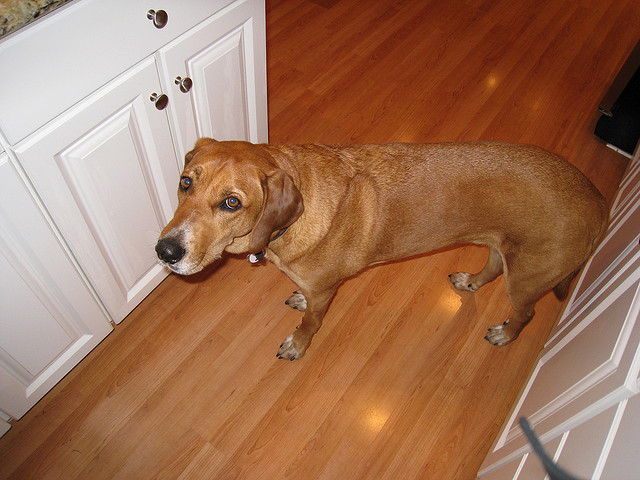

In [4]:
url = "http://images.cocodataset.org/val2014/COCO_val2014_000000537955.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [5]:
text = ["설거지를 하고 있는 한 소녀", "부엌 바닥에 작은 강아지가 있다.", "캐비닛 앞에 서 있는 갈색 강아지", "자동차", "부엌 한가운데에 고양이"]

inputs = tokenizer(
    text,
    return_tensors="pt",
    padding=True,
    truncation=True,
)

In [6]:
preprocess = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
image_tensor = preprocess(image).unsqueeze(0) 

data = {
    'input_ids': inputs['input_ids'],
    'attention_mask': inputs['attention_mask'],
    'pixel_values': image_tensor
}

In [7]:
outputs = model(**data)

probs = torch.softmax(outputs.logits_per_image, dim=1).squeeze()
sorted_probs = sorted(zip(text, probs), key=lambda x: x[1], reverse=True)

for idx, (txt, prob) in enumerate(sorted_probs):
    print(f"{idx + 1}. {txt}: {prob:.4f}")

1. 캐비닛 앞에 서 있는 갈색 강아지: 0.8089
2. 부엌 바닥에 작은 강아지가 있다.: 0.1910
3. 부엌 한가운데에 고양이: 0.0001
4. 설거지를 하고 있는 한 소녀: 0.0000
5. 자동차: 0.0000
